Segue uma sequência de gráficos de variáveis que explicam o comportamento do USDBRL entre 2010 - 2020

USDBRL

[*********************100%%**********************]  1 of 1 completed


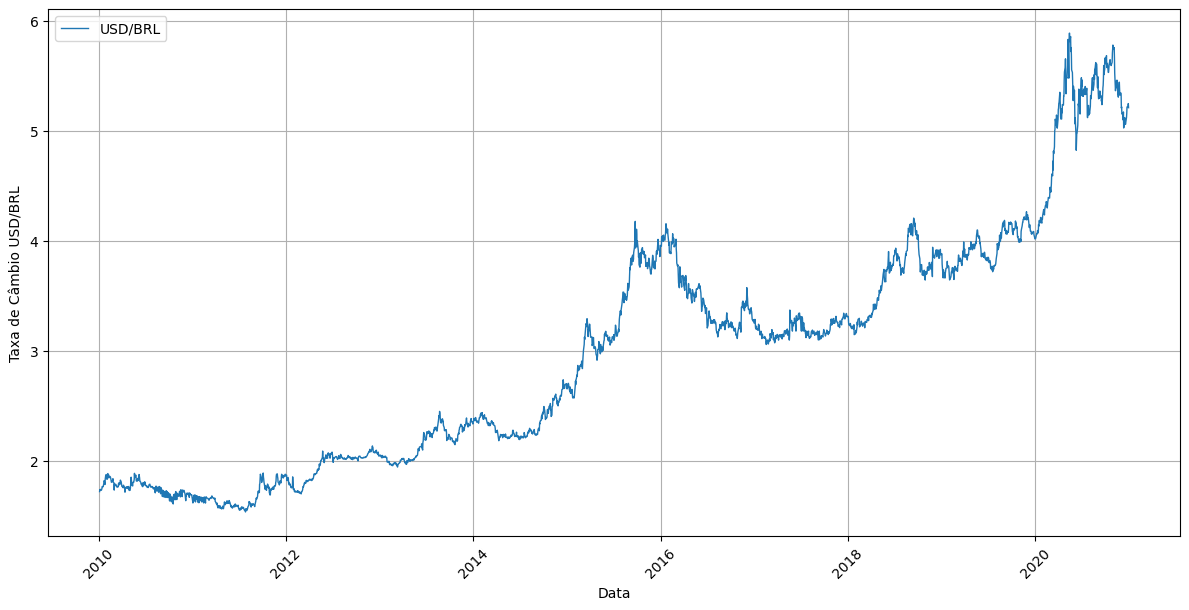

In [ ]:

import yfinance as yf
import matplotlib.pyplot as plt

# Define o intervalo de datas desejado (2010-01-01 a 2020-12-31)
data_inicio = "2010-01-01"
data_fim = "2020-12-31"

# Define o ticker do par de moedas (USD/BRL)
ticker = "USDBRL=X"

# Obtém os dados do Yahoo Finance
dados = yf.download(ticker, start=data_inicio, end=data_fim)

# Cria o gráfico de linha com a linha reta
plt.figure(figsize=(12, 6))
plt.plot(dados["Adj Close"], label="USD/BRL", linestyle='-', linewidth=1.0)
plt.xlabel("Data")
plt.ylabel("Taxa de Câmbio USD/BRL")
plt.grid(True)
plt.legend()

# Mostra o gráfico
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()



Drawdown do USDBRL
Esse gráfico mede a magnitude da queda da moeda americana

[*********************100%%**********************]  1 of 1 completed


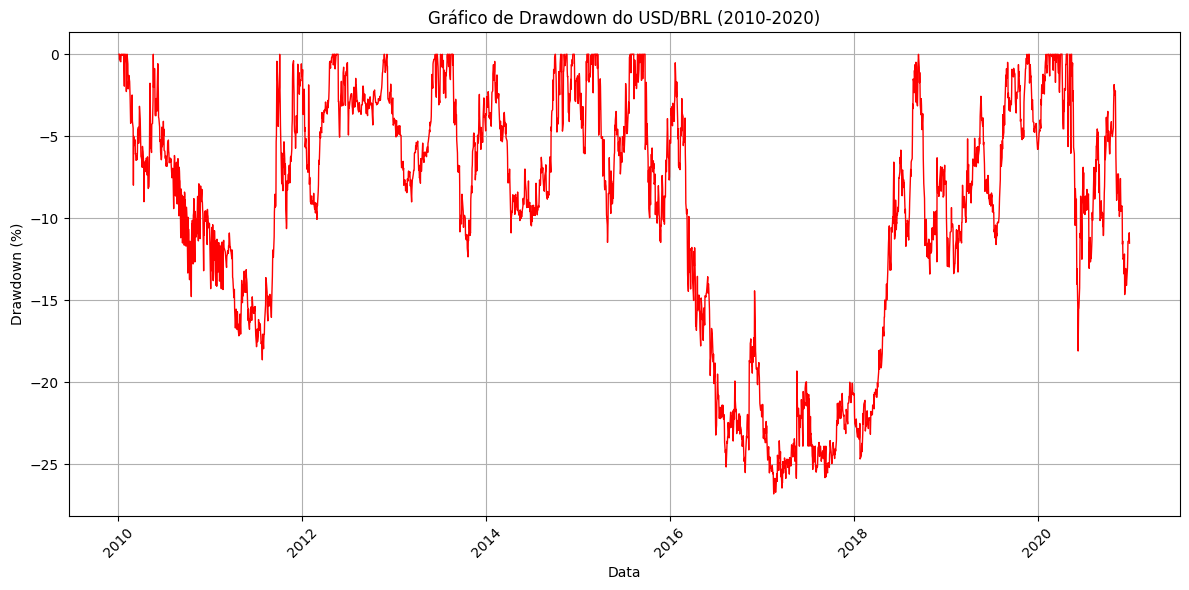

In [ ]:

import yfinance as yf
import matplotlib.pyplot as plt

# Define o símbolo do par de moedas USD/BRL
simbolo = "USDBRL=X"

# Define o período de tempo (2010-01-01 a 2020-12-31)
inicio = "2010-01-01"
fim = "2020-12-31"

# Baixa os dados do Yahoo Finance
dados = yf.download(simbolo, start=inicio, end=fim)

# Calcula o drawdown em porcentagem a partir dos dados
max_values = dados['Close'].cummax()
drawdown = ((dados['Close'] - max_values) / max_values) * 100

# Cria o gráfico de drawdown
plt.figure(figsize=(12, 6))

# Pinta a parte superior da linha de drawdown de vermelho claro
plt.fill_between(dados.index, drawdown, 0, where=(drawdown >= 0), color='lightcoral')
plt.plot(dados.index, drawdown, color='red', linestyle='-', linewidth=1.0)

# Configurações adicionais do gráfico
plt.title("Gráfico de Drawdown do USD/BRL (2010-2020)")
plt.xlabel("Data")
plt.ylabel("Drawdown (%)")
plt.grid(True)

# Ajusta o espaçamento das datas no eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibe o gráfico
plt.tight_layout()
plt.show()



Gráfico de calor que mostra a variação do dólar no período

[*********************100%%**********************]  1 of 1 completed


<ipython-input-8-8003e6c2c94d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_usd_brl['Ano'] = dados_usd_brl.index.year
<ipython-input-8-8003e6c2c94d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_usd_brl['Mês'] = dados_usd_brl.index.month


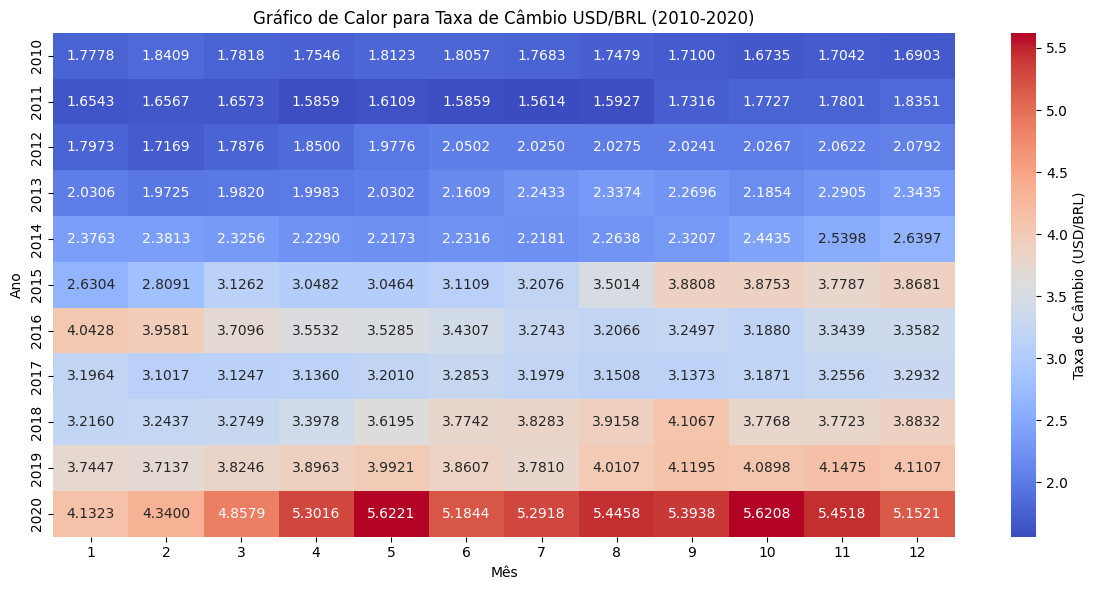

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Define o símbolo para o USD/BRL
simbolo_usd_brl = "USDBRL=X"

# Define o período de tempo (2010-01-01 a 2020-12-31)
inicio = "2010-01-01"
fim = "2020-12-31"

# Baixa os dados do Yahoo Finance para o USD/BRL
dados_usd_brl = yf.download(simbolo_usd_brl, start=inicio, end=fim)

# Redimensiona os dados para ter uma única coluna de dados de fechamento
dados_usd_brl = dados_usd_brl[['Adj Close']]

# Redefine o índice para uma coluna de ano e mês
dados_usd_brl['Ano'] = dados_usd_brl.index.year
dados_usd_brl['Mês'] = dados_usd_brl.index.month

# Pivotagem dos dados para criar um DataFrame adequado para um heatmap
dados_pivotados = dados_usd_brl.pivot_table(index='Ano', columns='Mês', values='Adj Close')

# Cria o gráfico de calor (heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(dados_pivotados, cmap='coolwarm', annot=True, fmt=".4f", cbar_kws={'label': 'Taxa de Câmbio (USD/BRL)'})
plt.title('Gráfico de Calor para Taxa de Câmbio USD/BRL (2010-2020)')
plt.xlabel('Mês')
plt.ylabel('Ano')

# Exibe o gráfico
plt.tight_layout()
plt.show()




Taxa de juros americana

[*********************100%%**********************]  1 of 1 completed


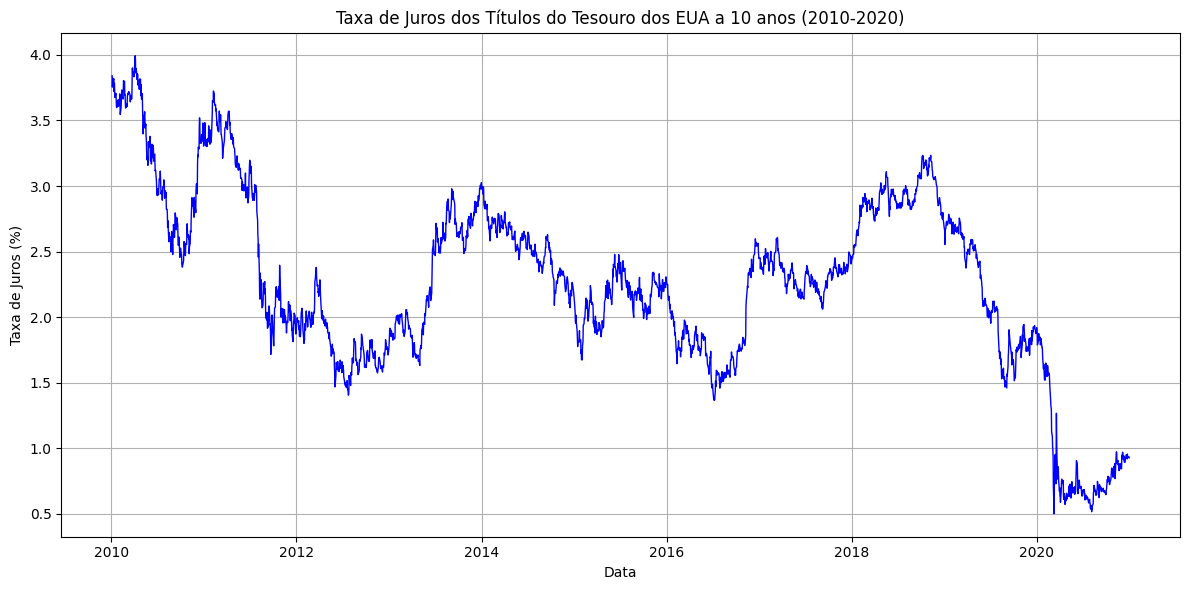

In [ ]:

import yfinance as yf
import matplotlib.pyplot as plt

# Define o símbolo para a taxa de juros dos títulos do Tesouro dos EUA a 10 anos
simbolo_taxa_juros = "^TNX"

# Define o período de tempo (2010-01-01 a 2020-12-31)
inicio = "2010-01-01"
fim = "2020-12-31"

# Baixa os dados do Yahoo Finance para a taxa de juros
dados_taxa_juros = yf.download(simbolo_taxa_juros, start=inicio, end=fim)

# Cria o gráfico da taxa de juros
plt.figure(figsize=(12, 6))
plt.plot(dados_taxa_juros.index, dados_taxa_juros['Adj Close'], label='Taxa de Juros', color='blue', linewidth=1.0)
plt.title('Taxa de Juros dos Títulos do Tesouro dos EUA a 10 anos (2010-2020)')
plt.xlabel('Data')
plt.ylabel('Taxa de Juros (%)')
plt.grid(True)

# Exibe o gráfico
plt.tight_layout()
plt.show()



A Taxa SELIC meta, uma das poucas variáveis que alteram a taxa de câmbio e está no controle do governo.

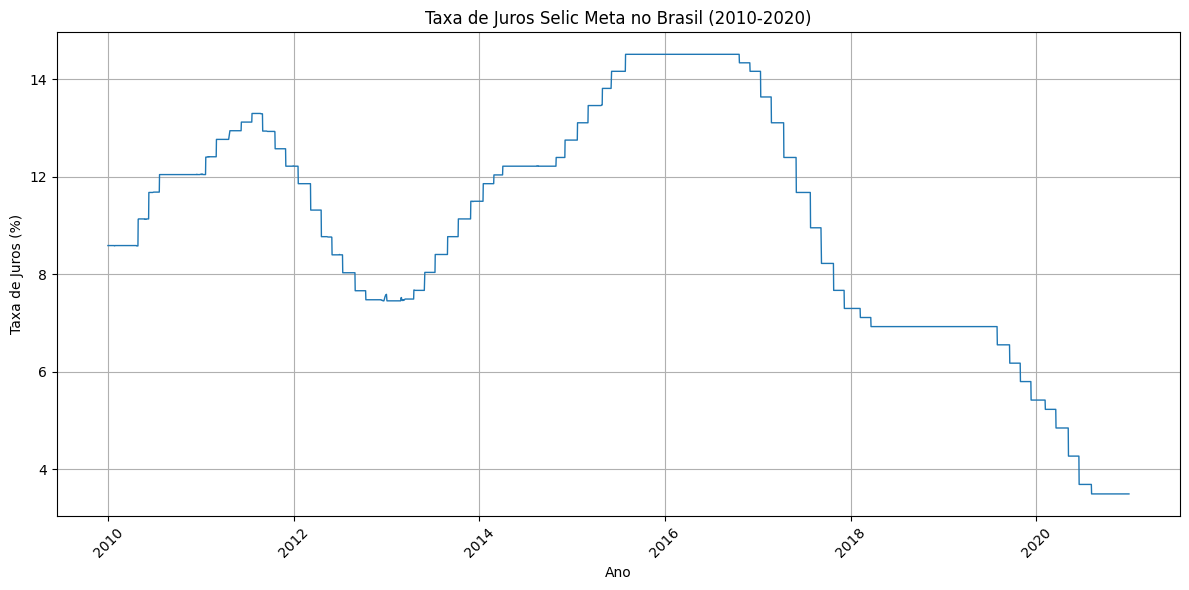

In [ ]:

import requests
import matplotlib.pyplot as plt
import pandas as pd

# URL do Banco Central com os dados da Selic Meta
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json&dataInicial=01/01/2010&dataFinal=31/12/2020"

# Faz a solicitação HTTP
response = requests.get(url)

# Verifica se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Converte os dados JSON em um DataFrame do Pandas
    data = response.json()
    df = pd.DataFrame(data)

    # Converte a coluna "valor" para float
    df['valor'] = df['valor'].str.replace(',', '.').astype(float)

    # Converte a coluna "data" para datetime
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')

    # Cria o gráfico com uma linha mais fina (estilo '-')
    plt.figure(figsize=(12, 6))
    plt.plot(df['data'], df['valor'], linestyle='-', linewidth=1.0)
    plt.title("Taxa de Juros Selic Meta no Brasil (2010-2020)")
    plt.xlabel("Ano")
    plt.ylabel("Taxa de Juros (%)")
    plt.grid(True)

    # Ajusta o espaçamento das datas no eixo x para melhor legibilidade
    plt.xticks(rotation=45)

    # Define os valores e rótulos no eixo Y de acordo com as especificações
    plt.yticks([0.01, 0.02, 0.03, 0.04, 0.05], ["4", "6", "8", "12", "14"])

    # Mostra o gráfico
    plt.tight_layout()
    plt.show()
else:
    print("Falha na solicitação HTTP.")





O diferencial de juros impacta importações, exportações (balança cambial) e o fluxo de capitais

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


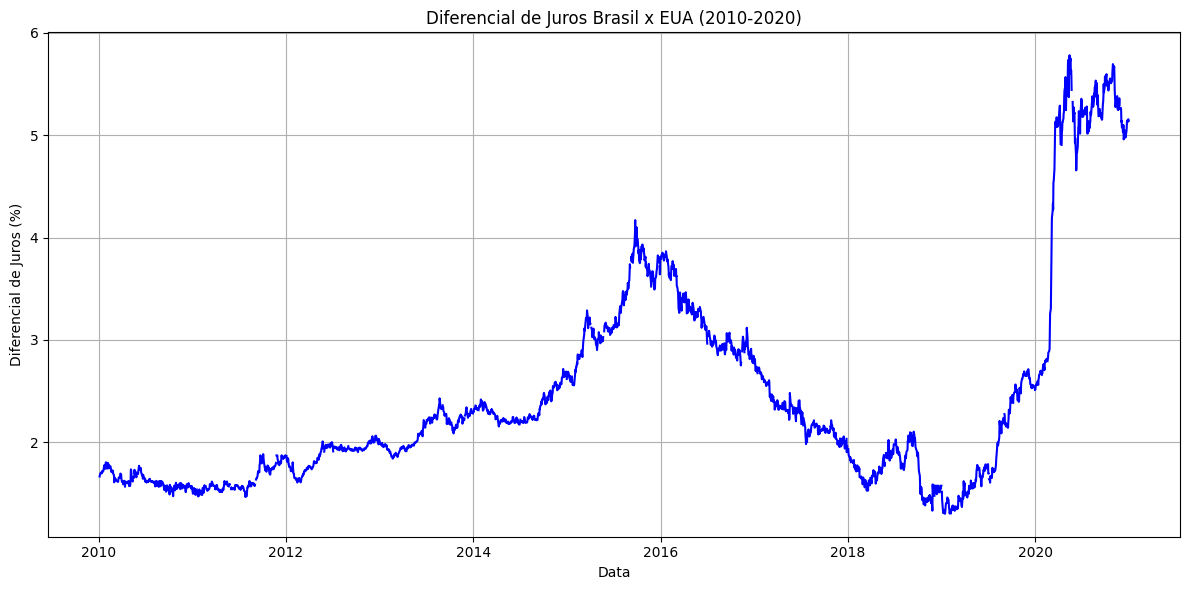

[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SELICIND']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


TypeError: ignored

In [ ]:

import yfinance as yf
import matplotlib.pyplot as plt

# Define os símbolos para as taxas de juros no Brasil (Taxa Selic) e nos EUA (Federal Funds Rate)
simbolo_selic = "BRL=X"
simbolo_federal_funds_rate = "^IRX"

# Define o período de tempo (2010-01-01 a 2020-12-31)
inicio = "2010-01-01"
fim = "2020-12-31"

# Baixa os dados do Yahoo Finance para as taxas de juros
dados_selic = yf.download(simbolo_selic, start=inicio, end=fim)
dados_federal_funds_rate = yf.download(simbolo_federal_funds_rate, start=inicio, end=fim)

# Calcula o diferencial de juros (Taxa Selic - Federal Funds Rate)
diferencial_juros = dados_selic['Adj Close'] - dados_federal_funds_rate['Adj Close']

# Cria o gráfico do diferencial de juros
plt.figure(figsize=(12, 6))
plt.plot(diferencial_juros.index, diferencial_juros, label='Diferencial de Juros', color='blue')
plt.title('Diferencial de Juros Brasil x EUA (2010-2020)')
plt.xlabel('Data')
plt.ylabel('Diferencial de Juros (%)')
plt.grid(True)

# Exibe o gráfico
plt.tight_layout()
plt.show()




import yfinance as yf
import matplotlib.pyplot as plt

# Define os símbolos para as taxas de juros do Brasil e dos Estados Unidos
simbolo_brasil = "SELICIND"
simbolo_eua = "^IRX"

# Define o período de tempo (2010-01-01 a 2020-12-31)
inicio = "2010-01-01"
fim = "2020-12-31"

# Baixa os dados do Yahoo Finance para as taxas de juros
dados_brasil = yf.download(simbolo_brasil, start=inicio, end=fim)
dados_eua = yf.download(simbolo_eua, start=inicio, end=fim)

# Ajusta os dados para ter a mesma frequência (mensal)
dados_brasil_mensal = dados_brasil.resample('M').last()
dados_eua_mensal = dados_eua.resample('M').last()

# Calcula o diferencial de juros
diferencial_juros = dados_brasil_mensal['Close'] - dados_eua_mensal['Close']

# Cria o gráfico do diferencial de juros
plt.figure(figsize=(12, 6))
plt.plot(diferencial_juros.index, diferencial_juros, label='Diferencial de Juros', color='blue')
plt.title('Diferencial de Juros Brasil x EUA (2010-2020)')
plt.xlabel('Data')
plt.ylabel('Diferencial de Juros (%)')
plt.grid(True)

# Exibe o gráfico
plt.tight_layout()
plt.show()



DXY - força do dólar em relação a uma cesta de moedas




[*********************100%%**********************]  1 of 1 completed


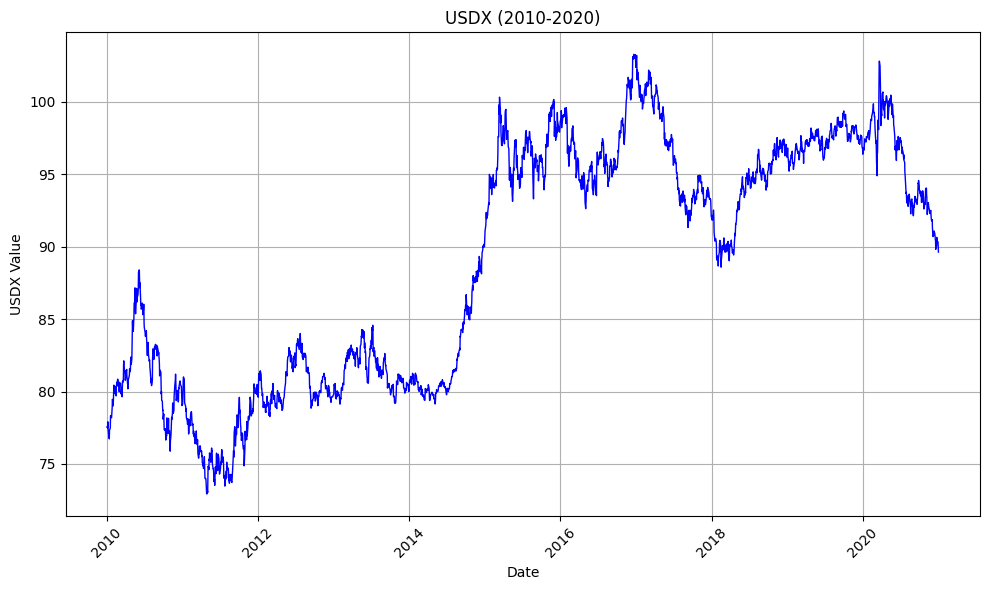

In [ ]:

import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol for USDX (U.S. Dollar Index)
ticker_symbol = 'DX-Y.NYB'

# Define the date range (2010-01-01 to 2020-12-31)
start_date = '2010-01-01'
end_date = '2020-12-31'

try:
    # Fetch USDX data from Yahoo Finance
    usdx_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    if not usdx_data.empty:
        # Extract USDX closing prices
        usdx_values = usdx_data['Adj Close']

        # Create a line chart with a thin line
        plt.figure(figsize=(10, 6))
        plt.plot(usdx_values.index, usdx_values, linestyle='-', linewidth=1.0, color='blue')

        # Customize chart
        plt.title('USDX (2010-2020)')
        plt.xlabel('Date')
        plt.ylabel('USDX Value')
        plt.grid(True)

        # Show the chart with a thin line
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    else:
        print("Failed to fetch USDX data from Yahoo Finance. Make sure the ticker symbol is correct.")

except Exception as e:
    print(f"An error occurred: {str(e)}")




Quando o preço das commodities se valorizam, o real também se valoriza


[*********************100%%**********************]  1 of 1 completed


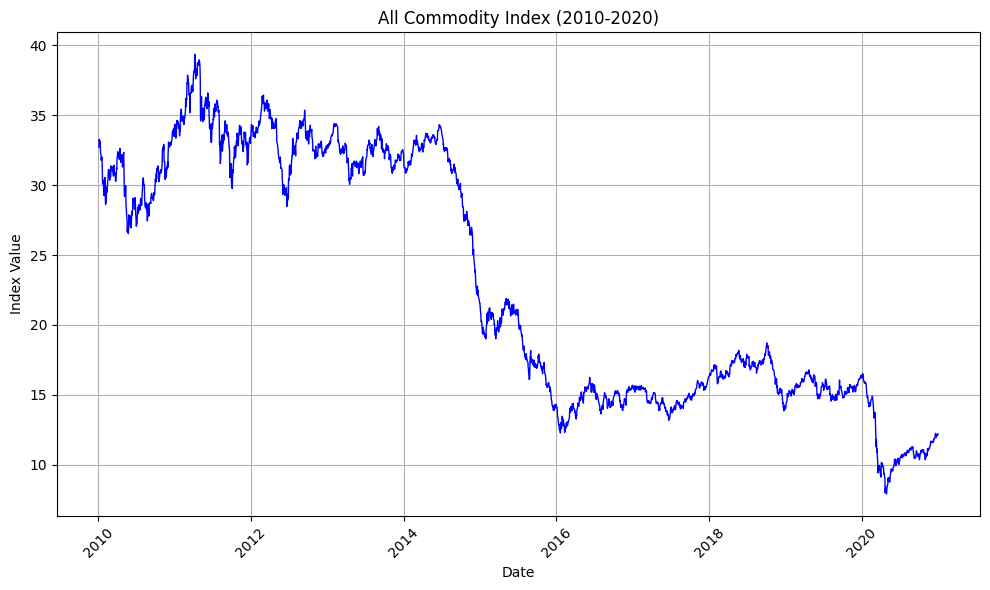

In [ ]:

import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol for the ETF representing the All Commodity Index (e.g., GSG)
ticker_symbol = 'GSG'

# Define the date range (2010-01-01 to 2020-12-31)
start_date = '2010-01-01'
end_date = '2020-12-31'

try:
    # Fetch data from Yahoo Finance for the specified ETF
    commodity_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    if not commodity_data.empty:
        # Extract the adjusted closing prices
        commodity_values = commodity_data['Adj Close']

        # Create a line chart with a thin line
        plt.figure(figsize=(10, 6))
        plt.plot(commodity_values.index, commodity_values, linestyle='-', linewidth=1.0, color='blue')

        # Customize chart
        plt.title('All Commodity Index (2010-2020)')
        plt.xlabel('Date')
        plt.ylabel('Index Value')
        plt.grid(True)

        # Show the chart with a thin line
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    else:
        print("Failed to fetch data from Yahoo Finance. Make sure the ticker symbol is correct.")

except Exception as e:
    print(f"An error occurred: {str(e)}")






Quando o índice de volatilidade (VIX) se valoriza, o real cai porque os investidores compram moeda forte (dólar) pra se proteger


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


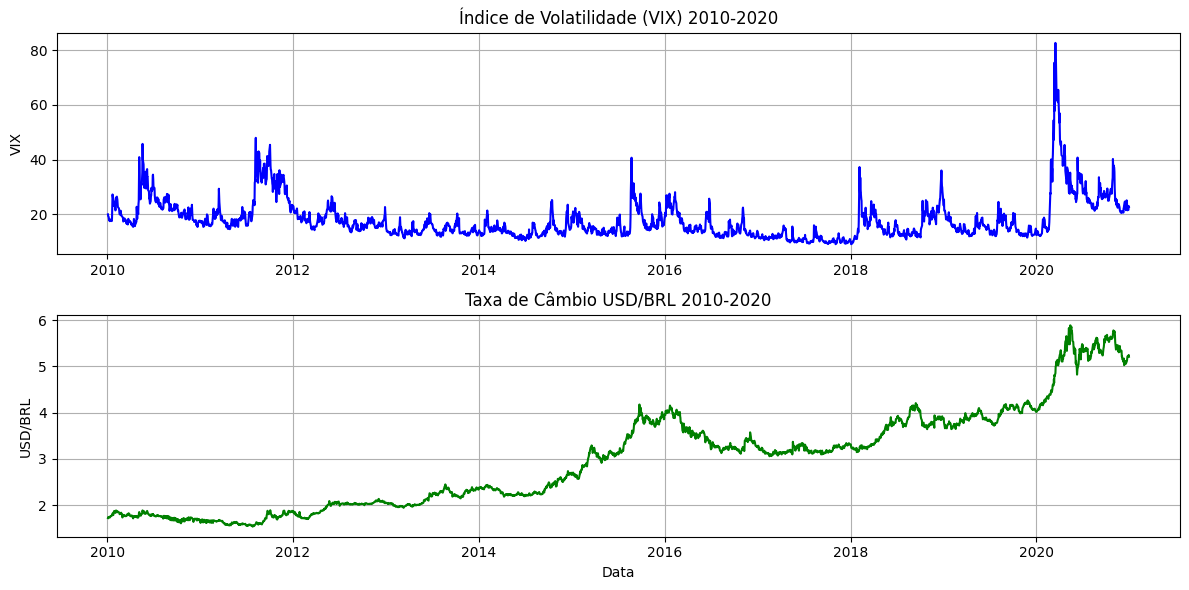

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define os símbolos para o VIX e USD/BRL
simbolo_vix = "^VIX"
simbolo_usd_brl = "USDBRL=X"

# Define o período de tempo (2010-01-01 a 2020-12-31)
inicio = "2010-01-01"
fim = "2020-12-31"

# Baixa os dados do Yahoo Finance para o VIX e USD/BRL
dados_vix = yf.download(simbolo_vix, start=inicio, end=fim)
dados_usd_brl = yf.download(simbolo_usd_brl, start=inicio, end=fim)

# Cria o primeiro gráfico para o VIX com grid
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(dados_vix.index, dados_vix['Adj Close'], label='VIX', color='blue')
plt.title('Índice de Volatilidade (VIX) 2010-2020')
plt.ylabel('VIX')
plt.grid(True)

# Cria o segundo gráfico para o USD/BRL com grid
plt.subplot(2, 1, 2)
plt.plot(dados_usd_brl.index, dados_usd_brl['Adj Close'], label='USD/BRL', color='green')
plt.title('Taxa de Câmbio USD/BRL 2010-2020')
plt.xlabel('Data')
plt.ylabel('USD/BRL')
plt.grid(True)

# Ajusta o espaçamento entre os gráficos
plt.tight_layout()

# Exibe os gráficos
plt.show()


Os termos de troca se referem a relação entre as exportações e importações. Uma melhora nos termos de troca significa que o país está exportando mais que importando.



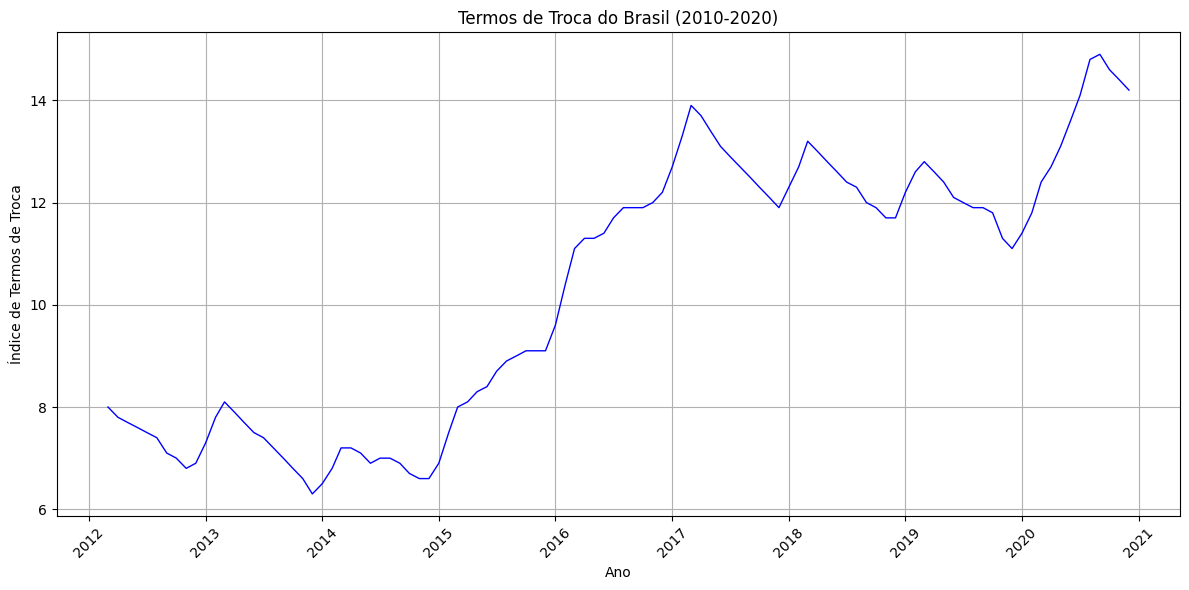

In [ ]:



import pandas as pd
import matplotlib.pyplot as plt
import requests

# URL da série temporal dos termos de troca no Banco Central
url_termos_troca = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.24369/dados?formato=json&dataInicial=01/01/2010&dataFinal=31/12/2020"

# Função para obter os dados da API e converter para DataFrame
def obter_dados(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data)
        df['valor'] = df['valor'].str.replace(',', '.').astype(float)
        df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
        return df
    else:
        print("Falha na solicitação HTTP.")
        return None

# Obtém os dados dos termos de troca
df_termos_troca = obter_dados(url_termos_troca)

# Cria o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_termos_troca['data'], df_termos_troca['valor'], linestyle='-', linewidth=1.0, color='blue')

plt.title("Termos de Troca do Brasil (2010-2020)")
plt.xlabel("Ano")
plt.ylabel("Índice de Termos de Troca")
plt.grid(True)

# Ajusta o espaçamento das datas no eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Mostra o gráfico
plt.tight_layout()
plt.show()


